In [7]:
# Data manipulation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
#import seaborn as sns

from sklearn import preprocessing
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import GridSearchCV
from sklearn import model_selection
from sklearn.feature_selection import VarianceThreshold
import math
from sklearn.preprocessing import MinMaxScaler


In [8]:
df=pd.read_csv("remove columns for training.csv",nrows=60000)
df=df.set_index([' Timestamp'])
df.head(-5)

,0,1,5,6,7,8,16,17,18,19,...,37,38,39,40,41,44,45,46,47,50
Timestamp,,,,,,,,,,,,,,,,,,,,,
28/12/2015 10:00:00 AM,0.899252,0.079590,0.517105,0.969912,0.605175,0.871842,0.438773,0.938236,0.478870,0.5,...,0.245834,0.946095,0.851485,0.990524,0.989701,0.992506,0.837398,0.986241,0.000074,0
28/12/2015 10:00:01 AM,0.906373,0.079680,0.517105,0.969912,0.605175,0.871842,0.438773,0.938835,0.478870,0.5,...,0.245834,0.946095,0.884489,0.990524,0.989701,0.992506,0.837398,0.987674,0.000074,0
28/12/2015 10:00:02 AM,0.922274,0.079590,0.517105,0.969134,0.605175,0.870745,0.437492,0.938998,0.479554,0.5,...,0.245834,0.945375,0.877887,0.990524,0.992379,0.992688,0.837398,0.987674,0.000074,0
28/12/2015 10:00:03 AM,0.939006,0.079860,0.517105,0.969134,0.605175,0.870745,0.437492,0.938998,0.480239,0.5,...,0.245834,0.945375,0.854314,0.990524,0.992379,0.992688,0.837398,0.986528,0.000074,0
28/12/2015 10:00:04 AM,0.951940,0.081027,0.517105,0.969134,0.605175,0.871019,0.437492,0.938998,0.480839,0.5,...,0.245834,0.945375,0.854314,0.990524,0.992379,0.992688,0.837398,0.984522,0.000074,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29/12/2015 2:39:50 AM,0.919782,0.015002,0.041828,0.962649,0.818896,0.871476,0.439698,0.941286,0.206820,0.5,...,0.266666,0.972927,0.855729,0.979153,0.978785,0.969105,0.495935,0.950128,0.000000,0
29/12/2015 2:39:51 AM,0.938294,0.016080,0.041828,0.962649,0.818896,0.871476,0.439698,0.941286,0.206734,0.5,...,0.266666,0.970052,0.856436,0.979153,0.983316,0.969105,0.495935,0.950128,0.000000,0
29/12/2015 2:39:52 AM,0.949567,0.015541,0.041828,0.962649,0.818896,0.871476,0.439698,0.941286,0.207077,0.5,...,0.266666,0.970052,0.853134,0.979153,0.985582,0.966910,0.495935,0.950128,0.000000,0


In [9]:
last_col_index=len(df.columns)-1
df.rename(columns={df.columns[last_col_index]:'Label'},inplace=True)
df.head(-5)

,0,1,5,6,7,8,16,17,18,19,...,37,38,39,40,41,44,45,46,47,Label
Timestamp,,,,,,,,,,,,,,,,,,,,,
28/12/2015 10:00:00 AM,0.899252,0.079590,0.517105,0.969912,0.605175,0.871842,0.438773,0.938236,0.478870,0.5,...,0.245834,0.946095,0.851485,0.990524,0.989701,0.992506,0.837398,0.986241,0.000074,0
28/12/2015 10:00:01 AM,0.906373,0.079680,0.517105,0.969912,0.605175,0.871842,0.438773,0.938835,0.478870,0.5,...,0.245834,0.946095,0.884489,0.990524,0.989701,0.992506,0.837398,0.987674,0.000074,0
28/12/2015 10:00:02 AM,0.922274,0.079590,0.517105,0.969134,0.605175,0.870745,0.437492,0.938998,0.479554,0.5,...,0.245834,0.945375,0.877887,0.990524,0.992379,0.992688,0.837398,0.987674,0.000074,0
28/12/2015 10:00:03 AM,0.939006,0.079860,0.517105,0.969134,0.605175,0.870745,0.437492,0.938998,0.480239,0.5,...,0.245834,0.945375,0.854314,0.990524,0.992379,0.992688,0.837398,0.986528,0.000074,0
28/12/2015 10:00:04 AM,0.951940,0.081027,0.517105,0.969134,0.605175,0.871019,0.437492,0.938998,0.480839,0.5,...,0.245834,0.945375,0.854314,0.990524,0.992379,0.992688,0.837398,0.984522,0.000074,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29/12/2015 2:39:50 AM,0.919782,0.015002,0.041828,0.962649,0.818896,0.871476,0.439698,0.941286,0.206820,0.5,...,0.266666,0.972927,0.855729,0.979153,0.978785,0.969105,0.495935,0.950128,0.000000,0
29/12/2015 2:39:51 AM,0.938294,0.016080,0.041828,0.962649,0.818896,0.871476,0.439698,0.941286,0.206734,0.5,...,0.266666,0.970052,0.856436,0.979153,0.983316,0.969105,0.495935,0.950128,0.000000,0
29/12/2015 2:39:52 AM,0.949567,0.015541,0.041828,0.962649,0.818896,0.871476,0.439698,0.941286,0.207077,0.5,...,0.266666,0.970052,0.853134,0.979153,0.985582,0.966910,0.495935,0.950128,0.000000,0


In [10]:
df.columns

Index(['0', '1', '5', '6', '7', '8', '16', '17', '18', '19', '20', '21', '22',
       '25', '26', '27', '28', '34', '35', '36', '37', '38', '39', '40', '41',
       '44', '45', '46', '47', 'Label'],
      dtype='object')

In [11]:
x_train=df.drop(['Label'],axis=1)
y_train=df['Label']

In [12]:
y_train.value_counts()

Label
0    60000
Name: count, dtype: int64

In [13]:
x_train.head(-5)

,0,1,5,6,7,8,16,17,18,19,...,36,37,38,39,40,41,44,45,46,47
Timestamp,,,,,,,,,,,,,,,,,,,,,
28/12/2015 10:00:00 AM,0.899252,0.079590,0.517105,0.969912,0.605175,0.871842,0.438773,0.938236,0.478870,0.5,...,0.21183,0.245834,0.946095,0.851485,0.990524,0.989701,0.992506,0.837398,0.986241,0.000074
28/12/2015 10:00:01 AM,0.906373,0.079680,0.517105,0.969912,0.605175,0.871842,0.438773,0.938835,0.478870,0.5,...,0.21183,0.245834,0.946095,0.884489,0.990524,0.989701,0.992506,0.837398,0.987674,0.000074
28/12/2015 10:00:02 AM,0.922274,0.079590,0.517105,0.969134,0.605175,0.870745,0.437492,0.938998,0.479554,0.5,...,0.21183,0.245834,0.945375,0.877887,0.990524,0.992379,0.992688,0.837398,0.987674,0.000074
28/12/2015 10:00:03 AM,0.939006,0.079860,0.517105,0.969134,0.605175,0.870745,0.437492,0.938998,0.480239,0.5,...,0.21183,0.245834,0.945375,0.854314,0.990524,0.992379,0.992688,0.837398,0.986528,0.000074
28/12/2015 10:00:04 AM,0.951940,0.081027,0.517105,0.969134,0.605175,0.871019,0.437492,0.938998,0.480839,0.5,...,0.21183,0.245834,0.945375,0.854314,0.990524,0.992379,0.992688,0.837398,0.984522,0.000074
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29/12/2015 2:39:50 AM,0.919782,0.015002,0.041828,0.962649,0.818896,0.871476,0.439698,0.941286,0.206820,0.5,...,0.01622,0.266666,0.972927,0.855729,0.979153,0.978785,0.969105,0.495935,0.950128,0.000000
29/12/2015 2:39:51 AM,0.938294,0.016080,0.041828,0.962649,0.818896,0.871476,0.439698,0.941286,0.206734,0.5,...,0.01622,0.266666,0.970052,0.856436,0.979153,0.983316,0.969105,0.495935,0.950128,0.000000
29/12/2015 2:39:52 AM,0.949567,0.015541,0.041828,0.962649,0.818896,0.871476,0.439698,0.941286,0.207077,0.5,...,0.01622,0.266666,0.970052,0.853134,0.979153,0.985582,0.966910,0.495935,0.950128,0.000000


In [14]:
x_train=x_train.to_numpy()
y_train=y_train.to_numpy()


In [15]:
#convert y_train to float32
#y_train= y_train.astype(np.float64)

In [16]:
x_train.dtype


dtype('float64')

In [17]:
y_train.dtype

dtype('int64')

In [18]:
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1)



In [19]:
print(x_train.shape)
print(y_train.shape)

(60000, 29, 1)
(60000,)


In [20]:
# attack-normal for train


# Scale numerical columns
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(df_)

df_= pd.DataFrame(x_scaled, index=df_.index)

#df_ = pd.concat([df_num, processed_df.drop(columns=num_col)], axis=1)

df_.head(-5)


df_.to_csv("/Users/swetha/Documents/minmaxed_a-n.csv")

In [21]:
df_test=pd.read_csv("remove_col_a-n.csv")
df_test.set_index([' Timestamp'],inplace=True)


In [22]:
#df_test.drop(['Unnamed: 7'],axis=1,inplace=True)

In [23]:
df_test.head(-5)

,0,1,5,6,7,8,16,17,18,19,...,37,38,39,40,41,44,45,46,47,51
Timestamp,,,,,,,,,,,,,,,,,,,,,
28/12/2015 10:00:00 AM,0.899252,0.079590,0.517105,0.969912,0.605175,0.871842,0.438773,0.938236,0.478870,0.5,...,0.245834,0.946095,0.851485,0.990524,0.989701,0.992506,0.837398,0.986241,0.000074,0
28/12/2015 10:00:01 AM,0.906373,0.079680,0.517105,0.969912,0.605175,0.871842,0.438773,0.938835,0.478870,0.5,...,0.245834,0.946095,0.884489,0.990524,0.989701,0.992506,0.837398,0.987674,0.000074,0
28/12/2015 10:00:02 AM,0.922274,0.079590,0.517105,0.969134,0.605175,0.870745,0.437492,0.938998,0.479554,0.5,...,0.245834,0.945375,0.877887,0.990524,0.992379,0.992688,0.837398,0.987674,0.000074,0
28/12/2015 10:00:03 AM,0.939006,0.079860,0.517105,0.969134,0.605175,0.870745,0.437492,0.938998,0.480239,0.5,...,0.245834,0.945375,0.854314,0.990524,0.992379,0.992688,0.837398,0.986528,0.000074,0
28/12/2015 10:00:04 AM,0.951940,0.081027,0.517105,0.969134,0.605175,0.871019,0.437492,0.938998,0.480839,0.5,...,0.245834,0.945375,0.854314,0.990524,0.992379,0.992688,0.837398,0.984522,0.000074,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29/12/2015 2:39:50 AM,0.919782,0.015002,0.041828,0.962649,0.818896,0.871476,0.439698,0.941286,0.206820,0.5,...,0.266666,0.972927,0.855729,0.979153,0.978785,0.969105,0.495935,0.950128,0.000000,0
29/12/2015 2:39:51 AM,0.938294,0.016080,0.041828,0.962649,0.818896,0.871476,0.439698,0.941286,0.206734,0.5,...,0.266666,0.970052,0.856436,0.979153,0.983316,0.969105,0.495935,0.950128,0.000000,0
29/12/2015 2:39:52 AM,0.949567,0.015541,0.041828,0.962649,0.818896,0.871476,0.439698,0.941286,0.207077,0.5,...,0.266666,0.970052,0.853134,0.979153,0.985582,0.966910,0.495935,0.950128,0.000000,0


In [24]:
last_col_index_=len(df_test.columns)-1
df_test.rename(columns={df_test.columns[last_col_index_]:'Label'},inplace=True)
df_test.head(-5)

,0,1,5,6,7,8,16,17,18,19,...,37,38,39,40,41,44,45,46,47,Label
Timestamp,,,,,,,,,,,,,,,,,,,,,
28/12/2015 10:00:00 AM,0.899252,0.079590,0.517105,0.969912,0.605175,0.871842,0.438773,0.938236,0.478870,0.5,...,0.245834,0.946095,0.851485,0.990524,0.989701,0.992506,0.837398,0.986241,0.000074,0
28/12/2015 10:00:01 AM,0.906373,0.079680,0.517105,0.969912,0.605175,0.871842,0.438773,0.938835,0.478870,0.5,...,0.245834,0.946095,0.884489,0.990524,0.989701,0.992506,0.837398,0.987674,0.000074,0
28/12/2015 10:00:02 AM,0.922274,0.079590,0.517105,0.969134,0.605175,0.870745,0.437492,0.938998,0.479554,0.5,...,0.245834,0.945375,0.877887,0.990524,0.992379,0.992688,0.837398,0.987674,0.000074,0
28/12/2015 10:00:03 AM,0.939006,0.079860,0.517105,0.969134,0.605175,0.870745,0.437492,0.938998,0.480239,0.5,...,0.245834,0.945375,0.854314,0.990524,0.992379,0.992688,0.837398,0.986528,0.000074,0
28/12/2015 10:00:04 AM,0.951940,0.081027,0.517105,0.969134,0.605175,0.871019,0.437492,0.938998,0.480839,0.5,...,0.245834,0.945375,0.854314,0.990524,0.992379,0.992688,0.837398,0.984522,0.000074,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29/12/2015 2:39:50 AM,0.919782,0.015002,0.041828,0.962649,0.818896,0.871476,0.439698,0.941286,0.206820,0.5,...,0.266666,0.972927,0.855729,0.979153,0.978785,0.969105,0.495935,0.950128,0.000000,0
29/12/2015 2:39:51 AM,0.938294,0.016080,0.041828,0.962649,0.818896,0.871476,0.439698,0.941286,0.206734,0.5,...,0.266666,0.970052,0.856436,0.979153,0.983316,0.969105,0.495935,0.950128,0.000000,0
29/12/2015 2:39:52 AM,0.949567,0.015541,0.041828,0.962649,0.818896,0.871476,0.439698,0.941286,0.207077,0.5,...,0.266666,0.970052,0.853134,0.979153,0.985582,0.966910,0.495935,0.950128,0.000000,0


In [25]:
df_test.columns

Index(['0', '1', '5', '6', '7', '8', '16', '17', '18', '19', '20', '21', '22',
       '25', '26', '27', '28', '34', '35', '36', '37', '38', '39', '40', '41',
       '44', '45', '46', '47', 'Label'],
      dtype='object')

In [26]:
x_test=df_test.drop('Label',axis=1)
y_test=df_test['Label']

In [27]:
print(x_test.shape)
print(y_test.shape)

(60000, 29)
(60000,)


In [28]:
n=len(np.unique(y_train))
print(n)

1


In [29]:
x_test=x_test.to_numpy()
y_test=y_test.to_numpy()

In [30]:
x_test=x_test.astype(np.float64)

In [31]:
print(x_test.dtype)
print(y_test.dtype)

float64
int64


In [32]:
x_test=x_test.reshape(x_test.shape[0],x_test.shape[1],1)

In [33]:
print(x_test.shape)
print(y_test.shape)

(60000, 29, 1)
(60000,)


In [34]:
print(x_train.shape)
print(y_train.shape)

(60000, 29, 1)
(60000,)


In [35]:
# Observation - training is done only with normal so, no. of classes is 1
#test can have a mix

In [36]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score,recall_score
from tensorflow.keras import layers
import keras

In [139]:
def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Attention and Normalization
    x= layers.MultiHeadAttention(
        key_dim=head_size, num_heads=num_heads, dropout=dropout
    )(inputs, inputs)
    x = layers.Dropout(dropout)(x)
    x = layers.LayerNormalization(epsilon=1e-6)(x)
    res = x + inputs

    # Feed Forward Part
    x = layers.Conv1D(filters=ff_dim, kernel_size=1, activation="relu")(res)
    x = layers.Dropout(dropout)(x)
    x = layers.Conv1D(filters=inputs.shape[-1], kernel_size=1)(x)
    x = layers.LayerNormalization(epsilon=1e-6)(x)
    return x + res

In [140]:
def build_model(
    input_shape,
    head_size,
    num_heads,
    ff_dim,
    num_transformer_blocks,
    mlp_units,
    dropout=0,
    mlp_dropout=0,
):
    inputs = keras.Input(shape=input_shape)
    x = inputs
    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

    x = layers.GlobalAveragePooling1D(data_format="channels_last")(x)
    for dim in mlp_units:
        x = layers.Dense(dim, activation="relu")(x)
        x = layers.Dropout(mlp_dropout)(x)
    outputs = layers.Dense(n_classes, activation="sigmoid")(x)
    return keras.Model(inputs, outputs)

n_classes=len(np.unique(y_train))
#n_classes=1

In [141]:
input_shape = x_train.shape[1:]

model = build_model(
    input_shape,
    head_size=256,
    num_heads=4,
    ff_dim=4,
    num_transformer_blocks=4,
    mlp_units=[128],
    mlp_dropout=0.4,
    dropout=0.25,
)

model.compile(
    loss="binary_crossentropy",
    optimizer=keras.optimizers.legacy.Adam(learning_rate=1e-4),
    metrics=["binary_accuracy"]
)

model.summary()

callbacks = [keras.callbacks.ModelCheckpoint("Full set_n-train_an-test_.h5", monitor="val_loss"),
              #keras.callbacks.ReduceLROnPlateau(monitor="val_loss", factor=0.5, patience=20, min_lr=0.0001),
             keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)]

history=model.fit(
    x_train,
    y_train,
    validation_split=0.2,
    epochs=10,
    batch_size=64,
    callbacks=callbacks,
)


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 29, 1)]              0         []                            
                                                                                                  
 multi_head_attention (Mult  (None, 29, 1)                7169      ['input_1[0][0]',             
 iHeadAttention)                                                     'input_1[0][0]']             
                                                                                                  
 dropout_8 (Dropout)         (None, 29, 1)                0         ['multi_head_attention[0][0]']
                                                                                                  
 layer_normalization (Layer  (None, 29, 1)                2         ['dropout_8[0][0]']       

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


750/750 [==============================] - 83s 111ms/step - loss: 0.0843 - binary_accuracy: 1.0000 - val_loss: 0.0293 - val_binary_accuracy: 1.0000
Epoch 3/10
750/750 [==============================] - 85s 113ms/step - loss: 0.0180 - binary_accuracy: 1.0000 - val_loss: 0.0083 - val_binary_accuracy: 1.0000
Epoch 4/10
750/750 [==============================] - 83s 111ms/step - loss: 0.0066 - binary_accuracy: 1.0000 - val_loss: 0.0033 - val_binary_accuracy: 1.0000
Epoch 5/10
750/750 [==============================] - 82s 110ms/step - loss: 0.0031 - binary_accuracy: 1.0000 - val_loss: 0.0015 - val_binary_accuracy: 1.0000
Epoch 6/10
750/750 [==============================] - 85s 113ms/step - loss: 0.0016 - binary_accuracy: 1.0000 - val_loss: 7.6008e-04 - val_binary_accuracy: 1.0000
Epoch 7/10
750/750 [==============================] - 83s 110ms/step - loss: 9.0327e-04 - binary_accuracy: 1.0000 - val_loss: 4.0635e-04 - val_binary_accuracy: 1.0000
Epoch 8/10
750/750 [=========================

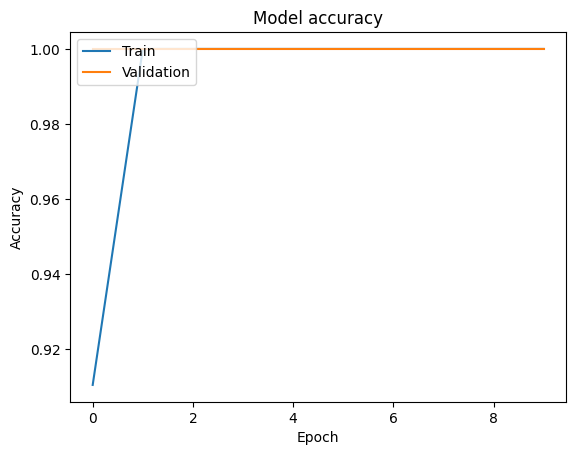

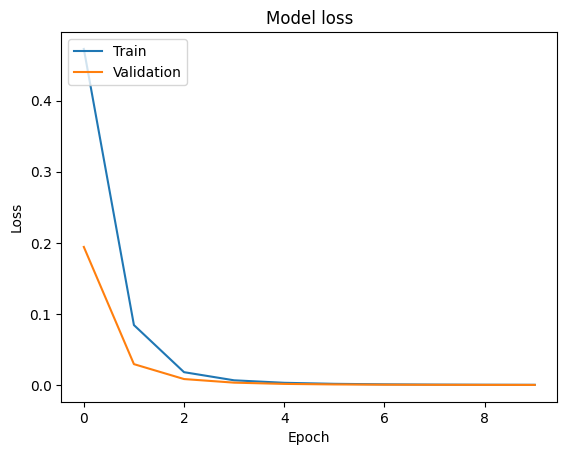

In [147]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['binary_accuracy'])
plt.plot(history.history['val_binary_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('accuracy_plot.png')
plt.show()


# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('loss_plot.png')
plt.show()



In [38]:
model = keras.models.load_model("Full set_n-train_an-test_.h5")

test_loss, test_acc = model.evaluate(x_test, y_test)

print("Test accuracy", test_acc)
print("Test loss", test_loss)



1875/1875 [==============================] - 45s 24ms/step - loss: 0.7192 - binary_accuracy: 0.9256
Test accuracy 0.9255666732788086
Test loss 0.7192416787147522


Convert probability data to binary data

In [37]:
from sklearn.metrics import roc_curve, roc_auc_score
model = keras.models.load_model("Full set_n-train_an-test_.h5")

# Generate predictions on test data
y_pred = model.predict(x_test)



1875/1875 [==============================] - 44s 23ms/step


In [39]:
print(y_pred)

[[5.5931097e-05]
 [5.5659682e-05]
 [5.5605680e-05]
 ...
 [6.5796223e-05]
 [6.5687571e-05]
 [6.5573979e-05]]


In [40]:
print(y_test)

[0 0 0 ... 0 0 0]


In [41]:
y_test=y_test.reshape(-1,1)

In [42]:
y_test

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [0]])

Best Threshold=0.000090


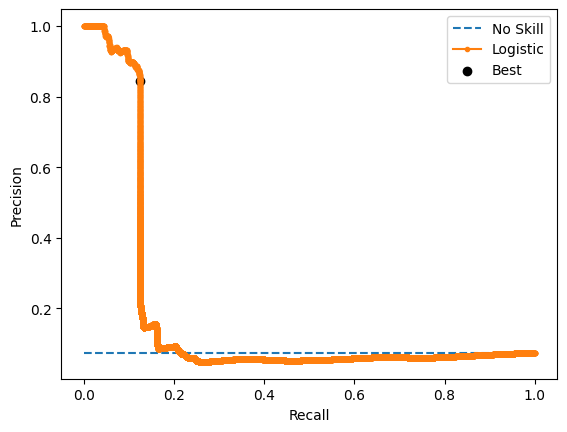

In [51]:
from numpy import argmax


from sklearn.metrics import precision_recall_curve
from matplotlib import pyplot

# calculate roc curves
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
# convert to f score
fscore = (2 * precision * recall) / (precision + recall)
# locate the index of the largest f score
ix = argmax(fscore)
print('Best Threshold=%f'%(thresholds[ix]))
# plot the roc curve for the model
no_skill = len(y_test[y_test==1]) / len(y_test)
pyplot.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
pyplot.plot(recall, precision, marker='.', label='Logistic')
pyplot.scatter(recall[ix], precision[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
pyplot.legend()
# show the plot
pyplot.savefig("precision-recall-curve.png")
pyplot.show()

In [46]:
from sklearn.metrics import confusion_matrix
threshold = 0.000090  
y_pred_binary = [1 if prob >= threshold else 0 for prob in y_pred]

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_binary)
print("Confusion Matrix:")
print(conf_matrix)




Confusion Matrix:
[[55427   107]
 [ 3906   560]]


In [1]:
tp=55427
fp=3906
fn=107
tn=560
accuracy=(tp+tn)/(tp+fp+tn+fn)
recall=tp/(tp+fn)
precision=tp/(tp+fp)
f1=2*(precision*recall)/(precision+recall)
print('accuracy score',accuracy)
print("recall score",recall)
print("precision score",precision)
print("f1 score",f1)



accuracy score 0.9331166666666667
recall score 0.9980732524219397
precision score 0.9341681694840982
f1 score 0.9650639435172852


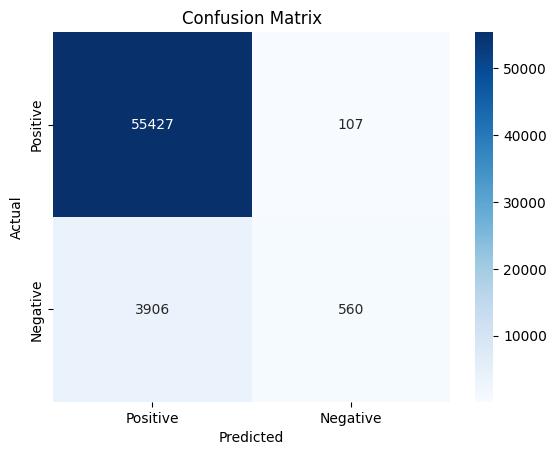

In [55]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion matrix values
conf_matrix = np.array([[55427, 107],
                        [3906, 560]])

# Labels for the matrix
labels = ['True Positive','False Negative', 'False Positive',  'True Negative']

# Reshape confusion matrix values
conf_matrix = conf_matrix.reshape(2, 2)

# Create heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=[ 'Positive','Negative',], yticklabels=[ 'Positive','Negative',])

# Add labels
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.savefig('12cf.png')

# Show plot
plt.show()


In [56]:
FP = 3906
TP = 55427  
FDR = FP / (FP + TP)
print("False Discovery Rate (FDR):", FDR)

False Discovery Rate (FDR): 0.06583183051590177


# END


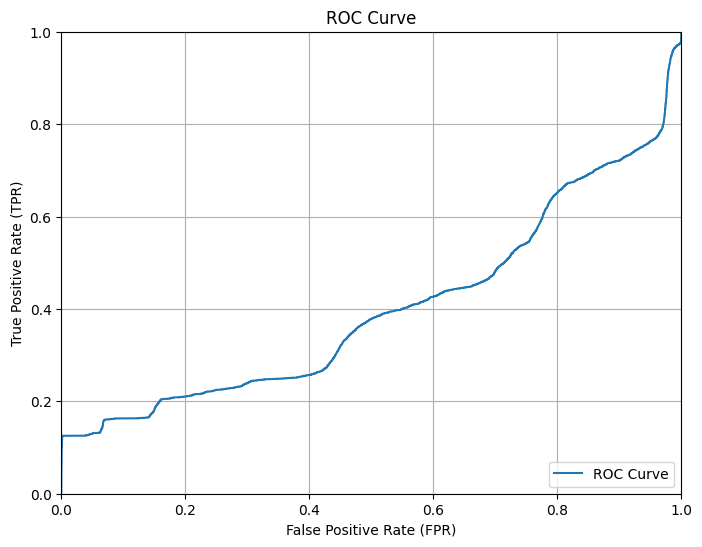

In [188]:
from sklearn.metrics import roc_curve, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are your ground truth labels and predicted probabilities

# Calculate ROC curve data
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.grid(True)
plt.legend(loc='lower right')
plt.show()


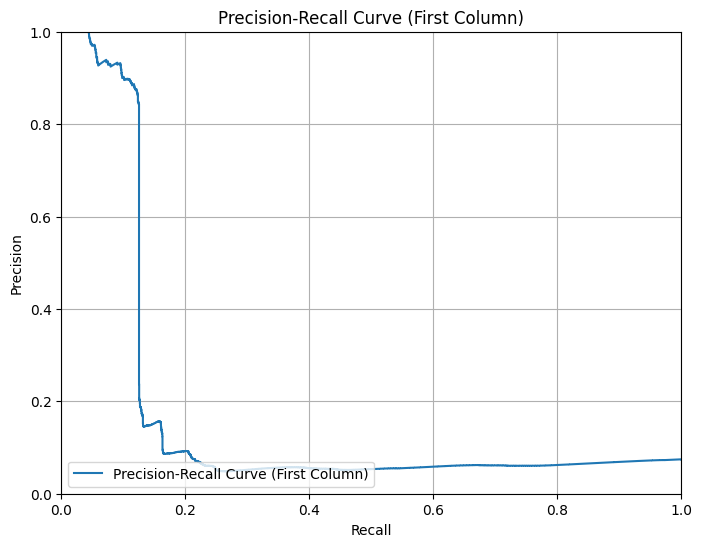

<Figure size 640x480 with 0 Axes>

In [196]:
#precision-recall curve
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are your ground truth labels and predicted probabilities

# Select the first column (0-based indexing) of y_pred
y_pred_single = y_pred[:, 0]  # Access the first column

# No need to reshape y_test if it's already 1D

# Calculate precision, recall, and thresholds for the curve
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_single)

# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recalls, precisions, label='Precision-Recall Curve (First Column)')
plt.title('Precision-Recall Curve (First Column)')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.grid(True)
plt.legend(loc='lower left')
plt.show()
plt.savefig("precision_recall_curve.jpg")

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


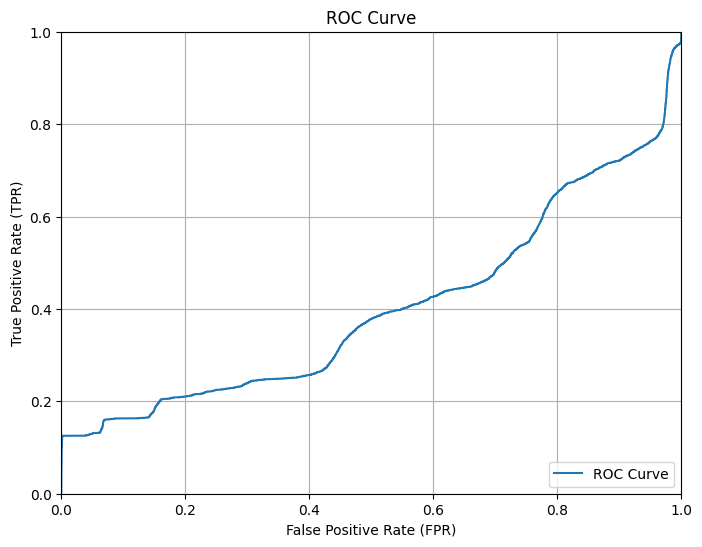

Threshold: 4.950425e-05
Precision: [0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.995, 0.9950248756218906, 0.9900990099009901, 0.9901960784313726, 0.9853658536585366, 0.9857142857142858, 0.981042654028436, 0.9812206572769953, 0.9766355140186916, 0.9767441860465116, 0.9769585253456221, 0.9770642201834863, 0.9726027397260274, 0.9727272727272728, 0.972972972972973, 0.9736842105263158, 0.9694323144104804, 0.9707112970711297, 0.970954356846473, 0.97165991902834, 0.967741935483871, 0.9681274900398407, 0.9642857142857143, 0.9645669291338582, 0.9607843137254902, 0.9612403100775194, 0.9538461538461539, 0.9545454545454546, 0.9438202247191011, 0.945054945054945, 0.9381818181818182, 0.9384057971014492, 0.9350180505415162, 0.935251798561151, 0.931899641577061, 0.9330985915492958, 0.9298245614035088, 0.9300699300699301, 0.926829268292683, 0.9302325581395349, 0.9306930693069307, 0.9355828220858896, 0.9359756097560976, 0.9391304347826087, 0.9337175792507204, 0.935933147632312, 0.93333333333

In [186]:
# now bard code
from sklearn.metrics import roc_curve, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are your ground truth labels and predicted probabilities

# Calculate ROC curve data
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate metrics for different thresholds
precisions = []
recalls = []
f1s = []
for threshold in thresholds:
    y_pred_bin = (y_pred >= threshold)  # Directly threshold y_pred
    precision = precision_score(y_test, y_pred_bin)
    recall = recall_score(y_test, y_pred_bin)
    f1 = f1_score(y_test, y_pred_bin)
    precisions.append(precision)
    recalls.append(recall)
    f1s.append(f1)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.grid(True)
plt.legend(loc='lower right')
plt.show()

# Analyze precision, recall, and F1 at different thresholds
#for i, threshold in enumerate(thresholds):
print(f"Threshold:",threshold)
print(f"Precision:",precisions)
print(f"Recall: ",recalls)
print(f"F1-Score:",f1s)
print("-" * 20)

# Choose the threshold based on the analysis
# Consider the trade-off between precision and recall in your context


ROC curve

In [177]:
from sklearn.metrics import roc_curve, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are your ground truth labels and predicted probabilities

# Calculate ROC curve data
fpr, tpr, threshold = roc_curve(y_test, y_pred)

# Calculate metrics for different thresholds
precisions = []
recalls = []
f1s = []#for threshold in thresholds:
y_pred_bin = np.where(y_pred >= threshold, 1, 0)
precision = precision_score(y_test, y_pred_bin)
recall = recall_score(y_test, y_pred_bin)
f1 = f1_score(y_test, y_pred_bin)
precisions.append(precision)
recalls.append(recall)
f1s.append(f1)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.grid(True)
plt.legend(loc='lower right')
plt.show()

# Analyze precision, recall, and F1 at different thresholds
#for i, threshold in enumerate(thresholds):
print(f"Threshold:",threshold)
print(f"Precision:",precisions)
print(f"Recall: ",recalls)
print(f"F1-Score:",f1s)
print("-" * 20)

# Choose the threshold based on the analysis
# Consider the trade-off between precision and recall in your context


ValueError: Classification metrics can't handle a mix of binary and multilabel-indicator targets

In [180]:
print(y_pred_bin.shape)
print(y_test.shape)

(60000, 16094)
(60000,)


In [184]:
print(y_pred_bin)

[[0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 ...
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]]


In [ ]:
mse = np.mean(np.power(y_test - y_pred, 2), axis=1)
print('Test MSE:', np.mean(mse))

In [238]:
np.count_nonzero(y_pred_bin==1)

60000

In [242]:
np.count_nonzero(y_test==1)

4466

In [235]:
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are your ground truth labels and predicted labels

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_bin)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[    0 55534]
 [    0  4466]]


In [216]:
print(y_pred_binary)

[[0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]


In [218]:
np.count_nonzero(y_pred_binary==1)

18000

In [219]:
np.count_nonzero(y_pred_binary==0)

42000

In [217]:
np.unique(y_pred_binary)

array([0, 1])

In [212]:
#y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate precision, recall, and F1 score
precision = precision_score(y_test, y_pred_classes, average='macro')
recall = recall_score(y_test, y_pred_classes, average='macro')
f1 = f1_score(y_test, y_pred_classes, average='macro')

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Precision: 0.4627833333333333
Recall: 0.5
F1 Score: 0.48067235618952


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1497: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
mse = np.mean(np.power(y_test - y_pred, 2), axis=1)
print('Test MSE:', np.mean(mse))

In [ ]:
import sklearn.metrics as metrics
threshold = np.quantile(mse, 0.97)
y_pred = [1 if e > threshold else 0 for e in mse]
y_true = [1 if x == 'Attack' else 0 for x in target_values]
accuracy = accuracy_score(y_true, y_pred)
precision = metrics.precision_score(y_true, y_pred)
recall = metrics.recall_score(y_true, y_pred)
f1_score = metrics.f1_score(y_true, y_pred)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-Score: {f1_score}")